# **Import required library**


# **Exploring the malware datasets**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense



Malware dataset is collected on [Kaggle by this link](https://www.kaggle.com/datasets/amauricio/pe-files-malwares) :

*   19611
unique values
*   6051 downloads and gain 135 downloads in the last 30 days

In [5]:
#import neccessary packages
import pandas as pd
import matplotlib.pyplot as plt

path = ".\dataset\dataset_malwares.csv"
df = pd.read_csv(path)


In [6]:
# Explore the shape of the dataset
print("The shape of the dataset is: %d samples, %d features" % (df.shape[0], df.shape[1]))

The shape of the dataset is: 19611 samples, 79 features


In [7]:
df.describe()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
count,19611.0,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.00000,19611.000000,...,1.961100e+04,19611.0,19611.000000,19611.000000,19611.000000,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04
mean,23117.0,178.615726,71.660752,49.146958,37.370710,37.032635,64178.739687,10.418490,226.46530,29.689103,...,3.163632e+09,0.0,6.112437,101.912804,14.131865,3.368566e+05,4.047213e+05,5.555810e+05,1.238834e+06,8.814868e+05
std,0.0,987.200729,1445.192977,1212.201919,864.515405,915.833139,9110.755873,637.116265,1249.68033,1015.303419,...,5.860332e+08,0.0,7.525158,127.076767,154.958102,2.181191e+07,4.704601e+06,6.772167e+06,5.868961e+07,2.167579e+07
min,23117.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1.073742e+09,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,2.000000,17.000000,0.000000,0.000000e+00,2.960400e+04,4.096000e+04,0.000000e+00,0.000000e+00
50%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,4.000000,80.000000,0.000000,0.000000e+00,8.222400e+04,1.310720e+05,0.000000e+00,0.000000e+00
75%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,8.000000,135.000000,0.000000,0.000000e+00,2.477080e+05,3.870720e+05,0.000000e+00,3.184640e+05
max,23117.0,59448.000000,63200.000000,64613.000000,43690.000000,43690.000000,65535.000000,61436.000000,65464.00000,63262.000000,...,4.294967e+09,0.0,588.000000,4016.000000,7319.000000,2.147484e+09,5.368914e+08,8.304108e+08,2.906159e+09,2.415919e+09


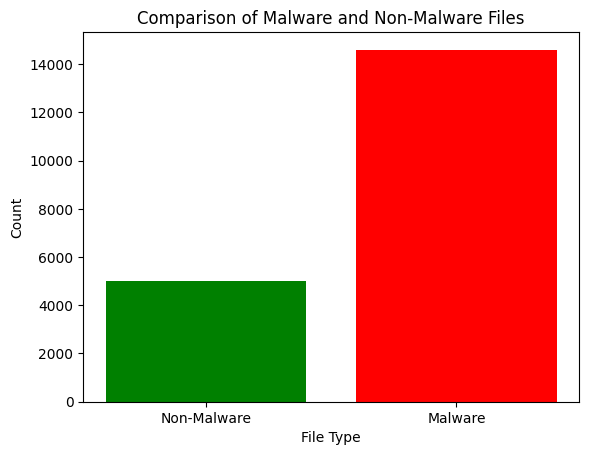

In [8]:
# Calculate counts of malware and non-malware
malware_count = (df['Malware'] == 1).sum()  # Summing the 1s (which represent malware)
non_malware_count = len(df) - malware_count  # Total count minus malware count

# Bar chart
categories = ['Non-Malware', 'Malware']
counts = [non_malware_count, malware_count]

plt.bar(categories, counts, color=['green', 'red'])
plt.xlabel('File Type')
plt.ylabel('Count')
plt.title('Comparison of Malware and Non-Malware Files')
plt.show()

**DATA CLEANING**

In [9]:
y = df["Malware"]
x = df.drop(columns = ["Malware","Name"])
print("The Name and Malware are remove successfully")
#left this part for further works later

The Name and Malware are remove successfully


# **Splitting the dataset into test set and train set**

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [11]:
# Information of training set
print("The shape of training set is: %d samples, %d features" % (X_train.shape[0], X_train.shape[1]))

The shape of training set is: 15688 samples, 77 features


# **Model**

**Random forest**

In [22]:
""" from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth = 2, random_state = 0)
randomModel = clf.fit(X_train,y_train) """
from keras.models import Sequential
from keras.layers import Dense
model =Sequential() 
#this model is used for the model which has smaller size of dataset
model.add(Dense(8, activation='relu',))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer='sgd',
metrics=['accuracy']) 


***Sequential model Evaluation on test data***

In [23]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [24]:
#accuracy on the train dataset
train_prediction = model.predict(X_train)
accuracy_score(y_train,train_prediction)

491/491 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


0.2566292707802142

In [25]:
#accuracy on the test dataset
test_prediction = model.predict(X_test)
accuracy_score(y_test,test_prediction)

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.2533775172062197

In [26]:
f1_score(y_test,test_prediction)

0.0

***Confusion matrix-Random forest model***

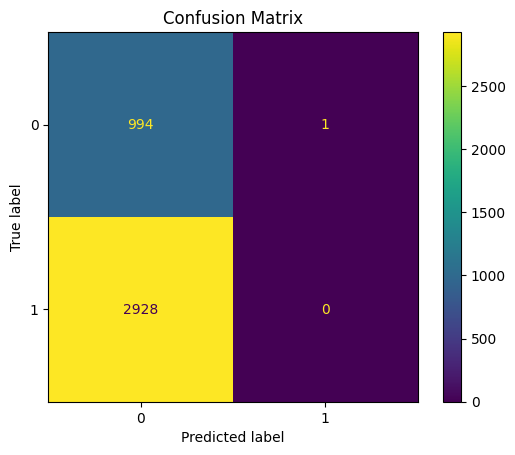

In [27]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

cm_display = ConfusionMatrixDisplay.from_predictions(
   y_test, test_prediction)
cm_display.ax_.set_title('Confusion Matrix')
plt.show()

***Save model***

In [28]:
from tensorflow.keras.models import Sequential

# Assuming 'model' is your trained Sequential model
model.save("my_sequential_model.h5")
